In [109]:
import pandas as pd                                       #to read csv file
import numpy as np                                        #to provide an array object
import matplotlib.pyplot as plt                           #used for data visualization   
import seaborn as sns                                     #used for data visualization

In [110]:
#reading the csv data and renaming the columns of the dataset
bdata= pd.read_csv('data_banknote_authentication.txt', header=None) 
bdata.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class'] 
print(bdata.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [111]:
#now lets check for null values in the dataset
bdata.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

##### There are no null values in the dataset

In [112]:
#let's find the description of columns of the dataset
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [113]:
#find the number of rows and columns in the dataset
bdata.shape

(1372, 5)

##### There are 1372 rows and 5 columns in the dataset

In [114]:
#statistically describing the dataframe
bdata.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Simple Exploratory Data Analysis

##### Performing EDA for data visualizaation

In [115]:
#total number of genuine and counterfeit notes present
bdata['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

##### The above indicates that there are 762 genuine notes and 610 counterfeit notes in the dataset

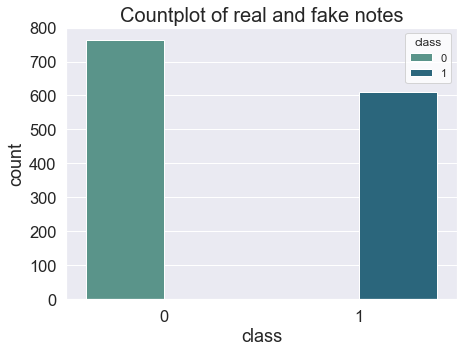

In [116]:
#Let's plot a countplot for the above
plt.figure(figsize=(7,5))
sns.set(font_scale=1.5)
plt.title('Countplot of real and fake notes',fontsize=20)
sns.set_theme(style="whitegrid")
sns.countplot(data=bdata, x="class",palette='crest',hue='class')
plt.show()

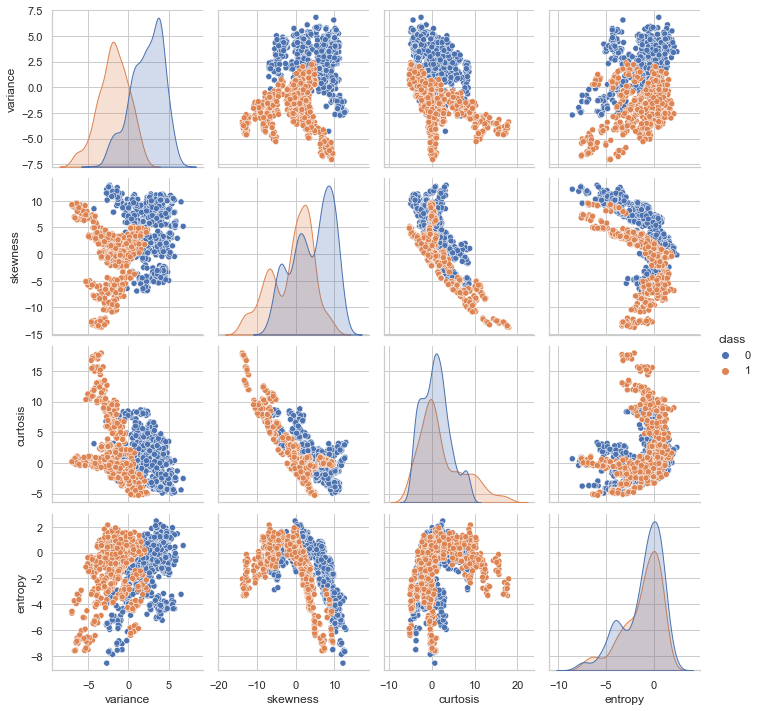

In [117]:
#pairplot among the characteristics of the note based on the class
sns.pairplot(bdata, hue="class", vars=["variance","skewness","curtosis","entropy"])
plt.show()

### Decision Tree classifier

In [118]:
#dividing the dataset into target set and feature set
y = bdata['class']
x = bdata.drop('class', axis = 1)

In [119]:
#Forming training and testign data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [120]:
#Building an empty model or creation of model
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

In [121]:
#Train the model
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
#Make predictions using hte predic function
predictions=classifier.predict(x_test)

In [123]:
#Finding the accuracy of the model
from sklearn.metrics import accuracy_score
d_tree=accuracy_score(y_test,predictions)
print('Accuracy using Decision Tree classifier is:',d_tree*100)

Accuracy using Decision Tree classifier is: 98.7864077669903


### KNeighbors Classifier

In [124]:
#dividing the dataset into target set and feature set
y = bdata['class']
x = bdata.drop('class', axis = 1)

In [125]:
#Forming training and testign data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [126]:
#buiding and training the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [127]:
#Make predictions using hte predic function
y_pred=knn.predict(x_test)

In [128]:
#Finding the accuracy of the model
from sklearn.metrics import accuracy_score
k_model=accuracy_score(y_test,predictions)
print('Accuracy using KNN model is:',k_model*100)

Accuracy using KNN model is: 49.51456310679612


### Logistic Regression

In [129]:
#balancing the data
target_count = bdata['class'].value_counts()
rows_to_delete = target_count[0] - target_count[1]
data = bdata.sample(frac=1, random_state=42).sort_values(by='class')
data = bdata[rows_to_delete:]
print(data['class'].value_counts())

0    610
1    610
Name: class, dtype: int64


In [130]:
#divide dataset to feature set and target set
x=bdata.drop(['class'],axis=1)
y=bdata['class']
#forming training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [131]:
#standardizing the data
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

In [132]:
#creation of model and training the model
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression(random_state=42)
lr.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [133]:
predictions=lr.predict(x_test)

In [134]:
#Finding the accuracy of the model
from sklearn.metrics import accuracy_score
lr_model=accuracy_score(y_test,predictions)
print('Accuracy using KNN model is:',lr_model*100)

Accuracy using KNN model is: 98.7864077669903


From the above three models used it can be concluded that Decision tree has a slight greater accuracy than Logistic 
Regression. Hence we can say that Decision Tree and Logistic Regression have better performance


##### checking whether the characterisics given is of a real or a fake note

In [135]:
#Decision Tree
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
print(f'Prediction:  Class{classifier.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {classifier.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [1. 0.]


In [136]:
#KNeighbors Classifier
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
print(f'Prediction:  Class{knn.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {knn.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [1. 0.]


In [137]:
#Logistic Regression
new_banknote = np.array([4.5, -8.1, 2.4, 1.4], ndmin=2)
new_banknote = scalar.transform(new_banknote)
print(f'Prediction:  Class{lr.predict(new_banknote)[0]}')
print(f'Probability [0/1]:  {lr.predict_proba(new_banknote)[0]}')

Prediction:  Class0
Probability [0/1]:  [0.69813947 0.30186053]


Looking at the predictions made above along with the probability, Logistic Regression model gives an accurate result